In [176]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import math
from numpy.linalg import inv

[ 0.5  0.5  0.5 ...,  0.3  0.4  0.2]
1.0 1.0
1.0 1.0
1.0 1.0
0.9048374180359595 0.34074
0.9048374180359595 0.34393
0.9048374180359595 1.0
0.6703200460356392 0.22395
0.6703200460356392 0.22749
0.6703200460356392 1.0
0.40656965974059917 0.10704
0.40656965974059917 0.10906
0.40656965974059917 1.0
0.20189651799465536 0.02008
0.20189651799465536 0.0218
0.20189651799465536 0.99997
0.0820849986238988 0.0017
0.0820849986238988 0.00206
0.0820849986238988 0.62449
0.499712
0.49936
0.037554
[   78   931  4386 11691 20623 24690 20613 11679  4310   907    92]
[  105   996  4411 11843 20355 24759 20493 11644  4315   978   101]


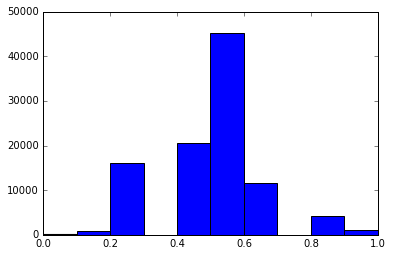

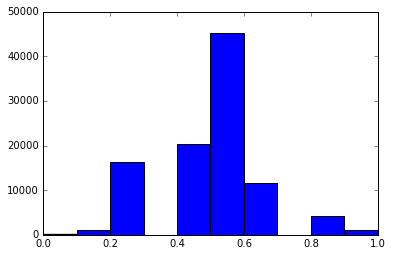

In [134]:
def coinflip():
    numtries = 100000
    numcoins = 1000
    numflips = 10
    
    v_1 = np.zeros(numtries)
    v_r = np.zeros(numtries)
    v_m = np.zeros(numtries)



#     print(v_1)
    # Running the experiement and collecting stats for the 3 coins
    for i in range(numtries):
        D = np.sign(np.random.uniform(-1,1,(numcoins,10)))
#         print(D)
        hfrac = ((np.sum(D,1)+numflips)/float(2*numflips))
#         print(hfrac)
        v_1[i] = hfrac[0]
        v_r[i] = hfrac[random.randint(0,999)]
        v_m[i] = np.min(hfrac)
        
    print(v_1)
    
    # Calculating which of these track the Hoeffding's bund
    for k in range(6):
        t = k/10.0
        print(math.exp(-(t**2)*10),sum(abs(v_1-0.5) >=t)/numtries)
        print(math.exp(-(t**2)*10),sum(abs(v_r-0.5) >=t)/numtries)
        print(math.exp(-(t**2)*10),sum(abs(v_m-0.5) >=t)/numtries)

#         print(abs(v_1-0.5) >=t)
#         print(sum(abs(v_1-0.5) >=t)/numtries)
#     print(v_r)
#     print(v_m)
    
    # Calculating averages for each
    print(np.sum(v_1)/numtries)
    print(np.sum(v_r)/numtries)
    print(np.sum(v_m)/numtries)


    print(np.bincount((v_1*10).astype(int)))
    print(np.bincount((v_r*10).astype(int)))

    plt.hist(v_1)
    plt.show()

    plt.hist(v_r)
    plt.show()


        

coinflip()

In [138]:
def getRandomLine():
    """
    Generate a random line between the [-1.1,1.1] x-range
    
    
    """
    p = np.random.uniform(-1,1,(2,2))
    m = (p[0,1] - p[1,1])/(p[0,0]-p[1,0])
    x = np.array([-1.1,1.1])
    y = m*(x-p[0,0])+p[0,1]
    return (x,y)

def getLabels(D,l=-1,vec = np.array([[0],[0],[0]])):
#     print(l[0],l[1])
    if (l!=-1):
        x = l[0]
        y = l[1]
        m = (y[0] - y[1])/(x[0]-x[1])
        t1 = -(m*(D[:,0]-x[0])+y[0]-D[:,1])
        return t1/abs(t1)
    if (np.any(vec)):
        A = np.hstack((np.ones([D.shape[0],1]),D))
        t4_1 = np.matmul(A,vec)
    #     print("Current W : {}".format(w[:,0]))
    #     print(t4_1)
        t5_1 = [int(k) for k in (t4_1/abs(t4_1)).flatten().tolist()]
        return t5_1
        

def vectoline(vec):
    w = vec[:,0]
#     print(w[0],w[1],w[2])
    x = np.array([-1.1,1.1])
    y = (-w[0]-w[1]*x)/w[2]
    return (x,y)

def draw(dat,lab=np.zeros(0),l=-1,col='gray',vec = np.array([[0],[0],[0]])):
    plt.figure(figsize=(5,5))
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    if (l!=-1):
        x = l[0]
        y = l[1]
        plt.plot([x[0], x[1]], [y[0], y[1]], color='k', linestyle='-', linewidth=2)
    if (np.any(vec)):
        l2 = vectoline(vec)
        x = l2[0]
        y = l2[1]
        plt.plot([x[0], x[1]], [y[0], y[1]], color='g', linestyle='-', linewidth=2)
    if (len(lab) != 0):
        plt.scatter(dat[:,0], dat[:,1],c=lab,cmap=col)
    else:
        plt.scatter(dat[:,0], dat[:,1])
    ax = plt.gca()

    plt.show()
    
60 45 30

In [230]:
def PLAStep(D,w_old,target):
    A = np.hstack((np.ones([D.shape[0],1]),D))
    t4 = np.matmul(A,w_old)[:,0]
#     print(t4)
    t4_1 = np.sign(t4)
    check = t4_1 == target

#     print("Matmul : {}".format(t4))

#     print("Y0 : {}".format(target))
#     print("Y1 : {}".format(t4_1))
#     print("Mismatches : {}".format(check))



    
    idxs = np.argwhere(check == False).flatten()
#     print("Mismatch at the following points {}".format(idxs))
    if idxs.shape[0] > 0:
        idx = np.random.choice(idxs)
#         print("Random index selected {}".format(idx))
        x_tmp = A[idx].reshape([3,1])
    #     print(x_tmp[:,0],target[idx],(x_tmp*target[idx])[:,0])
        w_new = w_old+x_tmp*target[idx]
    #     print(w_old[:,0],(x_tmp*target[idx])[:,0],w_new[:,0])
        return (w_new,idxs)
    else:
        return (w_old,idxs)

def Pdraw(D,w,target):
    print("Drawing regions")
    A = np.hstack((np.ones([D.shape[0],1]),D))
    t4_1 = np.matmul(A,w)
#     print(t4_1)
#     print("Current W : {}".format(w[:,0]))
#     print(t4_1)
    t5_1 = [int(k) for k in (t4_1/abs(t4_1)).flatten().tolist()]
#     print(t5_1)
#     print(target)
    t7 = abs(t5_1+target)-1
    t7_1 = t5_1==target
#     print(t7_1)
#     print("Y0 : {}".format(target))
#     print("Y1 : {}".format(t5_1))
#     print(t7)
    draw(D,l=vectoline(w),lab=t7_1)

# wcurr = w_init
# idxs = [0]
# for i in range(10):
#     wnew = PLAStep(D,wcurr,target)
#     wcurr = wnew
# (wcurr,idxs) = PLAStep(D,w_init,target)
# count = 0
# while idxs.shape[0] >0:
#     count = count+1
# #     print("Returned index : {}".format(idxs))
#     (wnew,idxs) = PLAStep(D,wcurr,target)
#     wcurr = wnew


# print("Terminated in {} steps with W: {}".format(count,wcurr))
# Pdraw(D,wcurr)
# # Pdraw(D,w1)
# w2 = PLAStep(D,w1,target)
# # Pdraw(D,w2)
# w3 = PLAStep(D,w2,target)
# # Pdraw(D,w3)
# w4 = PLAStep(D,w3,target)
# # Pdraw(D,w4)





In [356]:
def linearRegress(D,y):
    return (np.matmul(np.matmul(inv(np.matmul(D.T,D)),D.T),y))

In [395]:
def linE_in(D,w,target):
    actual = (np.sign(np.matmul(D,w))).flatten()
    hits = actual == target
    return (sum(hits)/target.shape)
# #     t4_1 = np.matmul(D,w)
#     print(t4_1)
#     print(np.sign(t4_1))
# #     t5_1 = [int(k) for k in (t4_1/abs(t4_1)).flatten().tolist()]
#     t7_1 = t5_1==target
#     return (sum(t7_1)/target.shape)

  

In [264]:
def runExperiment1(k1,k2,numiter):
    v_ein = np.zeros(numiter)
    v_eout = np.zeros(numiter)

    for ix in range(numiter):
        D = np.random.uniform(-1,1,(k1,2))
        l1 = getRandomLine()
        target = getLabels(D,l=l1)
#         draw(D,l=l1,lab=target)
        X = np.hstack((np.ones([D.shape[0],1]),D))
        wcurr = linearRegress(X,target.reshape((k1,1)))
#         Pdraw(D,wcurr,target)
        v_ein[ix] = linE_in(X,wcurr,target)
        D2 = np.random.uniform(-1,1,(k2,2))
        X2 = np.hstack((np.ones([D2.shape[0],1]),D2))
        target2 = getLabels(D2,l=l1)
        v_eout[ix] = linE_in(X2,wcurr,target2)
    print(1 - sum(v_ein)/numiter)
    print(1 - sum(v_eout)/numiter)


runExperiment1(100,1000,1000)

0.03986
0.047804


In [281]:
def runExperiment2(k1,numiter):
    sum1 = 0
    for ix in range(numiter):
        D = np.random.uniform(-1,1,(k1,2))
        l1 = getRandomLine()
        target = getLabels(D,l=l1)
#         draw(D,l=l1,lab=target)
        X = np.hstack((np.ones([D.shape[0],1]),D))
        w_init = linearRegress(X,target.reshape((k1,1)))
#         draw(D,l=l1,lab=target)
#         Pdraw(D,w_init,target)
        (wcurr,idxs) = PLAStep(D,w_init,target)
        count = 0
        while idxs.shape[0] >0:
            count = count+1
#     print("Returned index : {}".format(idxs))
            (wnew,idxs) = PLAStep(D,wcurr,target)
            wcurr = wnew
#         Pdraw(D,wcurr,target)
        sum1 = sum1+count
    print(sum1/numiter)



#         Pdraw(D,wcurr,target)


runExperiment2(10,1000)

3.872


In [312]:
def runExperiment3(k1,numiter):
    v_ein = np.zeros(numiter)

    for ix in range(numiter):
        D = np.random.uniform(-1,1,(k1,2))
        target = (np.sign(D[:,0]**2+D[:,1]**2-0.6))
#         draw(D,lab=target)
        for idx in (np.random.choice(k1,size=math.floor(k1/10),replace=False)):
            target[idx] = -target[idx]
#         draw(D,lab=target)
        X = np.hstack((np.ones([D.shape[0],1]),D))
        wcurr = linearRegress(X,target.reshape((k1,1)))
        v_ein[ix] = linE_in(X,wcurr,target)
    print(sum(v_ein)/numiter)


        

runExperiment3(1000,1000)

0.494171


In [432]:
def transform1(D):
    X = np.hstack((np.ones([D.shape[0],1]),
                   D,
                   ((D[:,0]*(D[:,1])).reshape((D.shape[0],1))),
                   ((D[:,0].reshape((D.shape[0],1)))**2),
                   ((D[:,1].reshape((D.shape[0],1)))**2)
                  ))
    return X

def vizregion(w):
    num = 10000
    D = np.random.uniform(-1,1,(num,2))
    D1 = transform1(D)
    target  = (np.sign(np.matmul(D1,w))).flatten()
    draw(D,lab=target)


    
def runExperiment4(k1,k2,numiter):
    v_ein = np.zeros(numiter)
    v_ein1 = np.zeros(numiter)
    v_ein2 = np.zeros(numiter)
    v_ein3 = np.zeros(numiter)
    v_ein4 = np.zeros(numiter)
    v_ein5 = np.zeros(numiter)

    v_eout = np.zeros(numiter)


    w1 = np.array([[-1],[-0.05],[0.08],[0.13],[1.5],[1.5]])

    w2 = np.array([[-1],[-0.05],[0.08],[0.13],[1.5],[15]])

    w3 = np.array([[-1],[-0.05],[0.08],[0.13],[15],[1.5]])

    w4 = np.array([[-1],[-1.5],[0.08],[0.13],[1.5],[1.5]])

    w5 = np.array([[-1],[-0.05],[0.08],[1.5],[0.15],[0.15]])

    for ix in range(numiter):
        #Generate k1 random points uniform on ([-1,1] X [-1,1])
        D = np.random.uniform(-1,1,(k1,2))
        target = (np.sign(D[:,0]**2+D[:,1]**2-0.6))
    #     draw(D,lab=target)
        for idx in (np.random.choice(k1,size=math.floor(k1/10),replace=False)):
            target[idx] = -target[idx]
#         draw(D,lab=target)
        D1 = transform1(D)
#         print(D)

        D2 = np.random.uniform(-1,1,(k2,2))
        target2 = (np.sign(D2[:,0]**2+D2[:,1]**2-0.6))
    #     draw(D,lab=target)
        for idx in (np.random.choice(k2,size=math.floor(k2/10),replace=False)):
            target2[idx] = -target2[idx]
#         draw(D2,lab=target2)
        D3 = transform1(D2)


        wcurr = linearRegress(D1,target.reshape((k1,1)))
#         vizregion(wcurr)
        
        v_ein[ix] = 1 - linE_in(D1,wcurr,target)
        v_ein1[ix] = 1 - linE_in(D1,w1,target)
        v_ein2[ix] = 1 - linE_in(D1,w2,target)
        v_ein3[ix] = 1 - linE_in(D1,w3,target)
        v_ein4[ix] = 1 - linE_in(D1,w4,target)
        v_ein5[ix] = 1 - linE_in(D1,w5,target)
        v_eout[ix] = 1 - linE_in(D3,wcurr,target2)
        
    print("E_in in w: {}".format(sum(v_ein)/numiter))
    print("E_in in w1: {}".format(sum(v_ein1)/numiter))
    print("E_in in w2: {}".format(sum(v_ein2)/numiter))
    print("E_in in w3: {}".format(sum(v_ein3)/numiter))
    print("E_in in w4: {}".format(sum(v_ein4)/numiter))
    print("E_in in w5: {}".format(sum(v_ein5)/numiter))
    print("E_out in w: {}".format(sum(v_eout)/numiter))


                
runExperiment4(1000,1000,1000)

E_in in w: 0.1242019999999999
E_in in w1: 0.1433630000000003
E_in in w2: 0.34883600000000037
E_in in w3: 0.3493920000000004
E_in in w4: 0.36049499999999957
E_in in w5: 0.4745740000000006
E_out in w: 0.126462
